In [2]:
class FirDriver(DefaultIP):
    def __init__(self, description):
        super().__init__(description=description)
    
    bindto = ['xilinx.com:hls:fir:1.0']
    
    @property
    def x(self):
        return self.read(0x10)
    
    @x.setter
    def x(self, value):
        self.write(0x10, value)

In [3]:
import pynq.lib.dma

firol = pynq.Overlay("./src/fir/fir.bit")

# dma = overlay.const_multiply.multiply_dma
# multiply = overlay.const_multiply.multiply

dma = firol.axi_dma_0
f = firol.fir_0


from pynq import Xlnk

xlnk = Xlnk()
in_buffer = xlnk.cma_array(shape=(11,), dtype=np.uint32)
out_buffer = xlnk.cma_array(shape=(11,), dtype=np.uint32)


# for i in range(11):
#     in_buffer[i] = 1

#     filt = [1,0,-1,0,2,3,2,0,-1,0,1]
# actualfilt = [53,0,-91,0,313,500,313,0,-91,0,53]
# f.x = 2
# dma.sendchannel.transfer(in_buffer)
# dma.recvchannel.transfer(out_buffer)
# # dma.sendchannel.wait()
# # dma.recvchannel.wait()

# out_buffer

[[0 0]
 [0 0]]


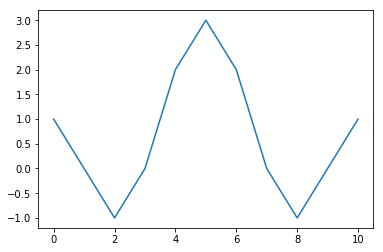

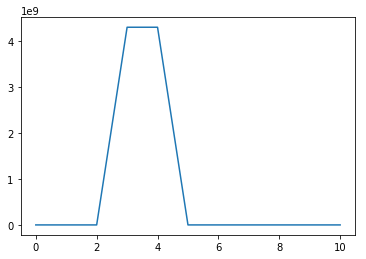

In [9]:
import pylab as py
import scipy as scipy
import matplotlib.pyplot as plt
import scipy.fftpack
import numpy.fft


fig1 = plt.figure()
ax1 = fig1.gca()
plt.plot(filt)

fig2 = plt.figure()
ax2 = fig2.gca()

plt.plot(out_buffer)

/opt/python3.6/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


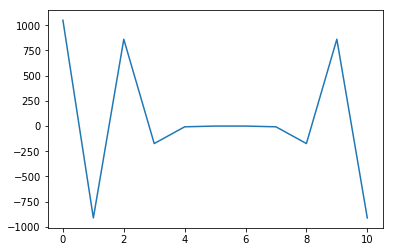

In [13]:
out = scipy.fftpack.fft(actualfilt)
plt.plot(out)